In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
# creating database connection
conn = sqlite3.connect('inventory.db')

# Fetching vendor summary data
df = pd.read_sql_query("select * from vendor_sales_summary", conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,Volume,ActualPrice,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,1750.0,36.99,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,1750.0,28.99,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,1750.0,24.99,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,1750.0,22.99,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,1750.0,29.99,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


## Exploratory Data Analysis
- Previously, we examined the various tables in the database to identify key variables, understand their relationships, and determine which ones should be included in the final analysis.

- In this phase of EDA, we will analyze the resultant table to gain insights into the distribution of each column. This will help us understand data patterns, identify anomalies, and ensure data quality before proceeding with further analysis.

In [3]:
# Summary Statistics
df.describe()

,VendorNumber,Brand,PurchasePrice,Volume,ActualPrice,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
count,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04,1.069200e+04,10692.000000,10692.000000
mean,10650.649458,18039.228769,24.385303,847.360550,35.643671,3140.886831,3.010669e+04,3077.482136,4.223907e+04,18793.783627,1774.226259,61433.763214,1.213238e+04,-inf,1.706793,2.504390
std,18753.519148,12662.187074,109.269375,664.309212,148.246016,11095.086769,1.230678e+05,10952.851391,1.676553e+05,44952.773386,10975.582240,60938.458032,4.622434e+04,NaN,6.020460,8.459067
min,2.000000,58.000000,0.360000,50.000000,0.490000,1.000000,7.100000e-01,0.000000,0.000000e+00,0.000000,0.000000,0.090000,-5.200278e+04,-inf,0.000000,0.000000
25%,3951.000000,5793.500000,6.840000,750.000000,10.990000,36.000000,4.534575e+02,33.000000,7.292200e+02,289.710000,4.800000,14069.870000,5.292000e+01,1.332451e+01,0.807229,1.153729
50%,7153.000000,18761.500000,10.455000,750.000000,15.990000,262.000000,3.655465e+03,261.000000,5.298045e+03,2857.800000,46.570000,50293.620000,1.399640e+03,3.040546e+01,0.981529,1.436894
75%,9552.000000,25514.250000,19.482500,750.000000,28.990000,1975.750000,2.073825e+04,1929.250000,2.839692e+04,16059.562500,418.650000,79528.990000,8.660200e+03,3.995613e+01,1.039342,1.665449
max,201359.000000,90631.000000,5681.810000,20000.000000,7499.990000,337660.000000,3.811252e+06,334939.000000,5.101920e+06,672819.310000,368242.800000,257032.070000,1.290668e+06,9.971666e+01,274.500000,352.928571


#### Objective: To understand the underlying distribution (e.g., normal, skewed, bimodal) of each numerical featur

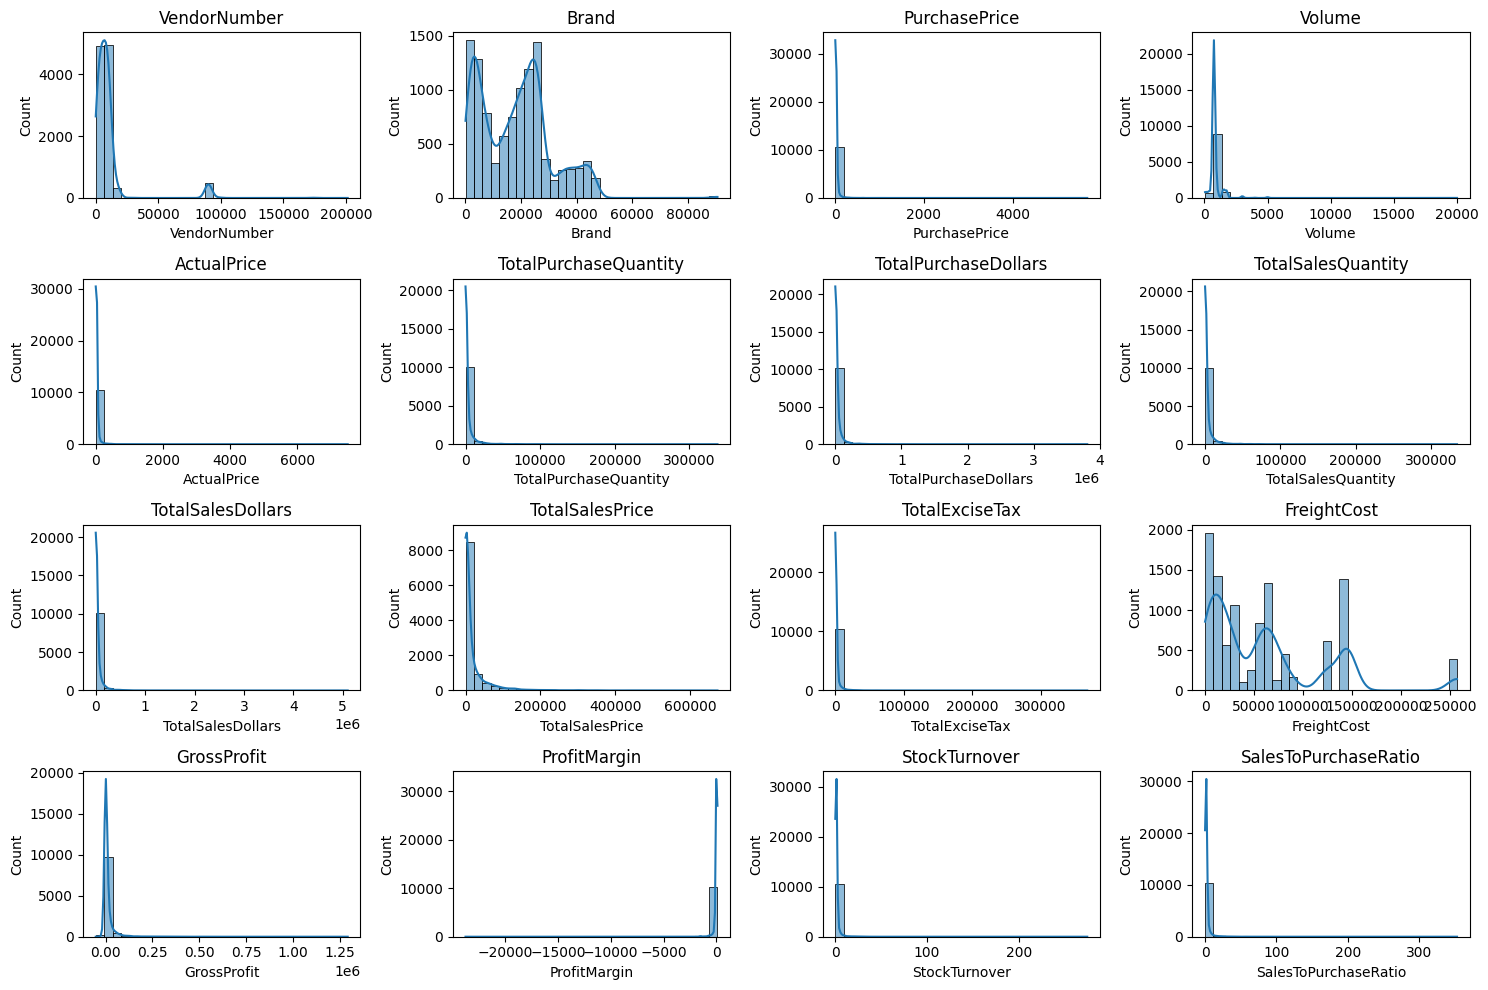

In [4]:
# Select all columns with numerical data types from the DataFrame df
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))

# Iterate over each identified numerical column to generate a separate plot
for i, col in enumerate(numerical_cols):
    # Create a subplot within a 4x4 grid. The position (i+1) increments for each plot.
    plt.subplot(4, 4, i + 1)
    
    # Generate a histogram to show frequency distribution.
    # 'kde=True' overlays a Kernel Density Estimate curve for a smoother representation of the distribution.
    # 'bins=30' specifies the number of bars, providing a good level of granularity.
    sns.histplot(df[col], kde=True, bins=30)
    
    # Set the title of each subplot to the corresponding column name.
    plt.title(col)

# Adjust subplot parameters for a clean, non-overlapping layout.
plt.tight_layout()
plt.show()

#### Objective: To visually identify outliers and understand the spread (quartiles, median) of each numerical feature.

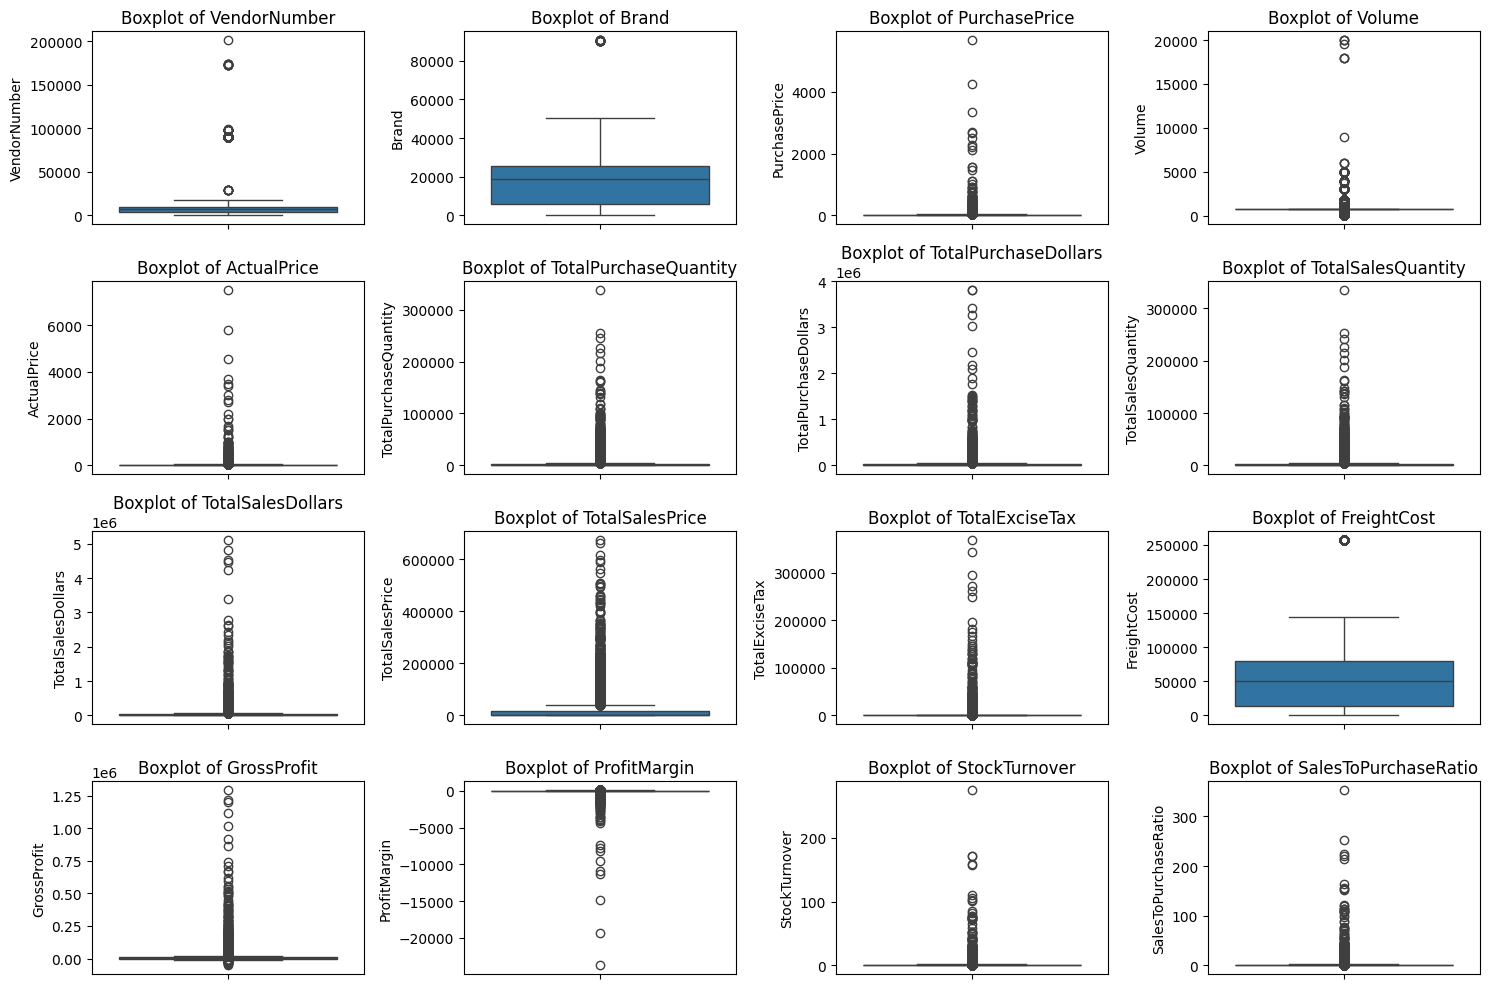

In [5]:
# Create a new figure for the boxplots.
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)
    
    """ Generate a boxplot. Each box represents the interquartile range (IQR), the line inside is the median,
    and the whiskers show the data range. Points outside the whiskers are potential outliers. """
    sns.boxplot(y=df[col]) # Use y-axis for a vertical boxplot
    
    # Set the title for each boxplot.
    plt.title(f'Boxplot of {col}')

# Adjust the layout to prevent titles and plots from overlapping.
plt.tight_layout()

# Display the figure with all the boxplots.
plt.show()

## Summary Statistics Insights:

#### Negative & Zero Values:

- Gross Profit: Minimum value is -52,002.78, indicating losses. Some products or transactions may be selling at a loss due to high costs or selling at discounts lower than the purchase price.
- Profit Margin: Has a minimum of -∞, which suggests cases where revenue is zero or even lower than costs.
- Total Sales Quantity & Sales Dollars: Minimum values are 0, meaning some products were purchased but never sold. These could be slow-moving or obsolete stock.

#### Outliers Indicated by High Standard Deviations:

- Purchase & Actual Prices: The max values (5,681.81 & 7,499.99) are significantly higher than the mean (24.39 & 35.64), indicating potential premium products.
- Freight Cost: Huge variation, from 0.09 to 257,032.07, suggests logistics inefficiencies or bulk shipments.
- Stock Turnover: Ranges from 0 to 274.5, implying some products sell extremely fast while others remain in stock indefinitely. Value more than 1 indicates that sold quantity for that product is higher than purchased quantity due to either sales are being fulfilled from older stock

In [6]:
# Filtering the data by removing inconsistencies
df = pd.read_sql_query("""SELECT *
FROM vendor_sales_summary
WHERE GrossProfit > 0
AND ProfitMargin > 0
AND TotalSalesQuantity > 0""", conn)
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,Volume,ActualPrice,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,1750.0,36.99,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,1750.0,28.99,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,1750.0,24.99,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,1750.0,22.99,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,1750.0,29.99,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,750.0,4.99,2,2.64,5.0,15.95,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667
8560,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,50.0,0.49,6,2.34,134.0,65.66,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829
8561,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,50.0,0.99,2,1.48,2.0,1.98,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838
8562,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,200.0,1.99,1,1.47,72.0,143.28,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388


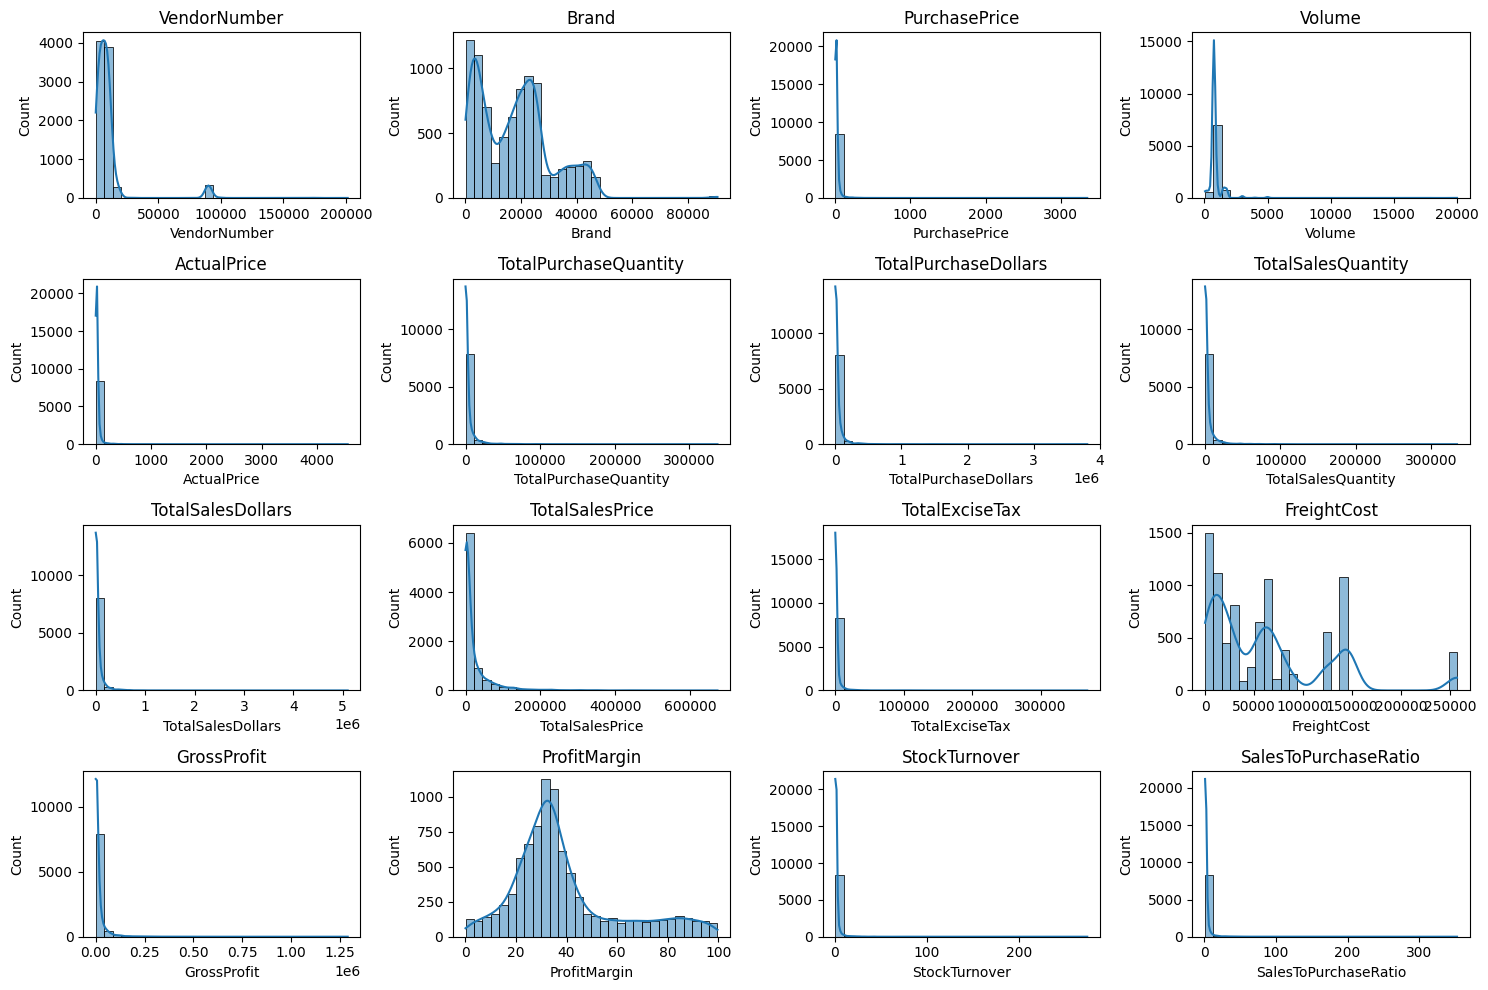

In [7]:
numerical_cols = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)

plt.tight_layout()
plt.show()

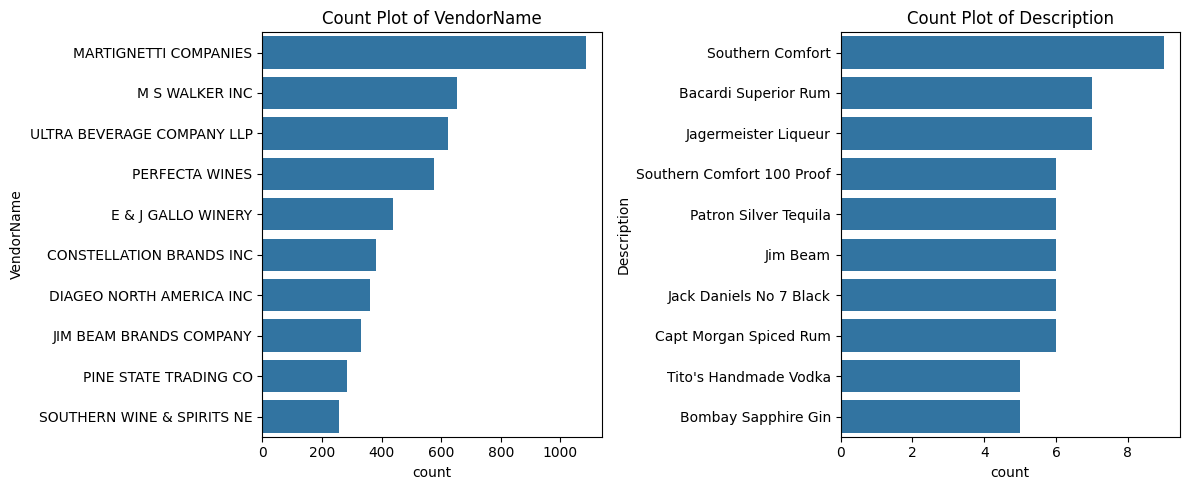

In [8]:
# Count Plots for Categorical Columns
categorical_cols = ["VendorName", "Description"]

plt.figure(figsize=(12, 5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 2, i+1)
    sns. countplot(y=df [col], order=df [col].value_counts().index[:10]) # Top 10 categories
    plt. title(f"Count Plot of {col}")
plt.tight_layout()
plt.show()

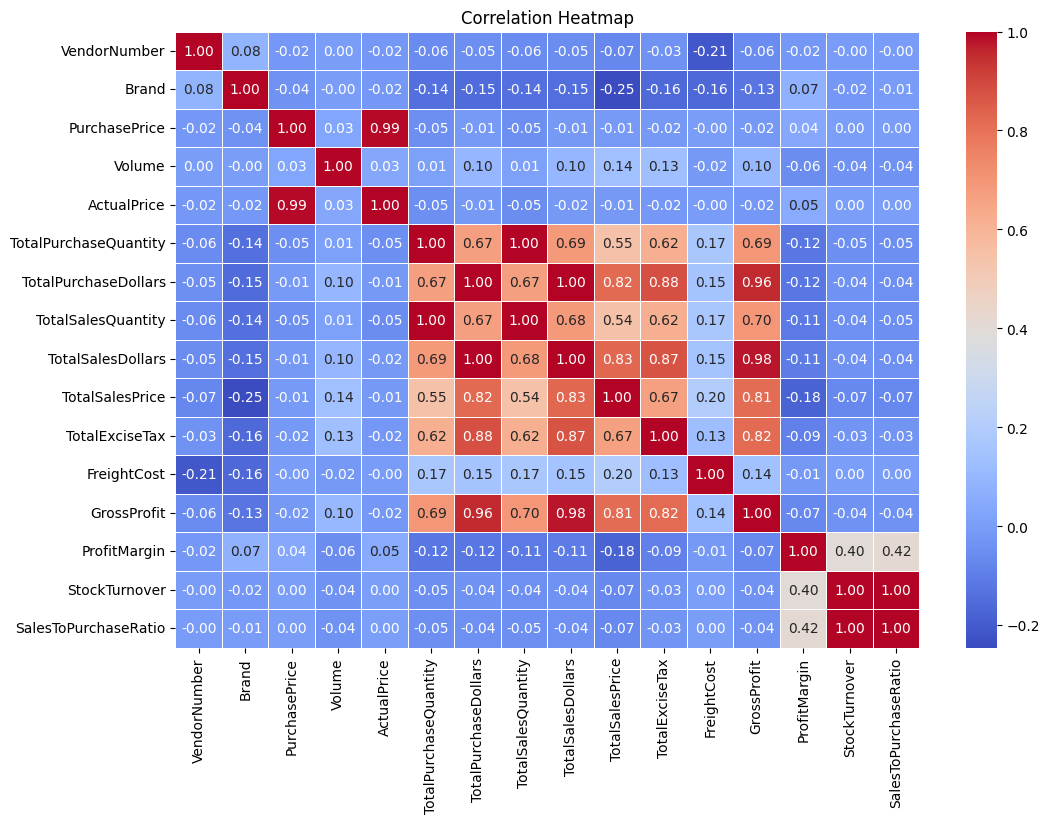

In [9]:
# Correlation Heatmap
# Setting the figure size
plt.figure(figsize=(12, 8))

# Calculating the correlation matrix for the numerical columns
correlation_matrix = df[numerical_cols].corr()

# Generating the heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.title("Correlation Heatmap")
plt.show()

### Correlation Insights
- PurchasePrice has weak correlations with TotalSalesDollars (-0.012) and GrossProfit (-0.016), suggesting that price variations do not significantly impact sales revenue or profit.
- Strong correlation between total purchase quantity and total sajes quantity (0.999), confirming efficient inventory turnover.
- Negative correlation between profit margin & total sales price (-0.179) suggests that as sales price increases, margins decrease, possibly due to competitive pricing pressures.
- StockTurnover has weak negative correlations with both GrossProfit (-0.038) and ProfitMargin (-0.055), indicating that faster turnover does not necessarily result in higher profitability.

### Data Analysis

##### Identify Brands that needs Promotional or Pricing Adjustments which exhibit lower sales performance but higher profit margins.

In [10]:
brand_performance = df.groupby('Description').agg({
    'TotalSalesDollars': 'sum',
    'ProfitMargin': 'mean'}).reset_index()
brand_performance

,Description,TotalSalesDollars,ProfitMargin
0,(RI) 1,21519.09,18.060661
1,.nparalleled Svgn Blanc,1094.63,29.978166
2,10 Span Cab Svgn CC,2703.89,20.937612
3,10 Span Chard CC,3325.56,27.806445
4,10 Span Pnt Gris Monterey Cy,2082.22,32.226182
...,...,...,...
7702,Zorvino Vyds Sangiovese,10579.03,29.525675
7703,Zuccardi Q Malbec,1639.18,23.981503
7704,Zum Rsl,10857.34,32.675038
7705,Zwack Liqueur,227.88,16.653502


In [11]:
# Establish a threshold for "low sales" by calculating the 15th percentile (first quartile) of total sales dollars.
# Brands below this value are considered to have low sales.
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)

In [12]:
# Establish a threshold for "high profit margin" by calculating the 85th percentile.
# Brands above this value are considered to have a high profit margin.
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)

In [13]:
low_sales_threshold

560.299

In [14]:
high_margin_threshold

64.97017552750113

In [15]:
# Filter brands with low sales but high profit margins
target_brands = brand_performance[
    (brand_performance['TotalSalesDollars'] <= low_sales_threshold) &
    (brand_performance['ProfitMargin'] >= high_margin_threshold)
]
print("Brands with Low Sales but High Profit Margins:")
display(target_brands.sort_values('TotalSalesDollars'))

Brands with Low Sales but High Profit Margins:


,Description,TotalSalesDollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


In [16]:
brand_performance = brand_performance[brand_performance['TotalSalesDollars'] < 10000]

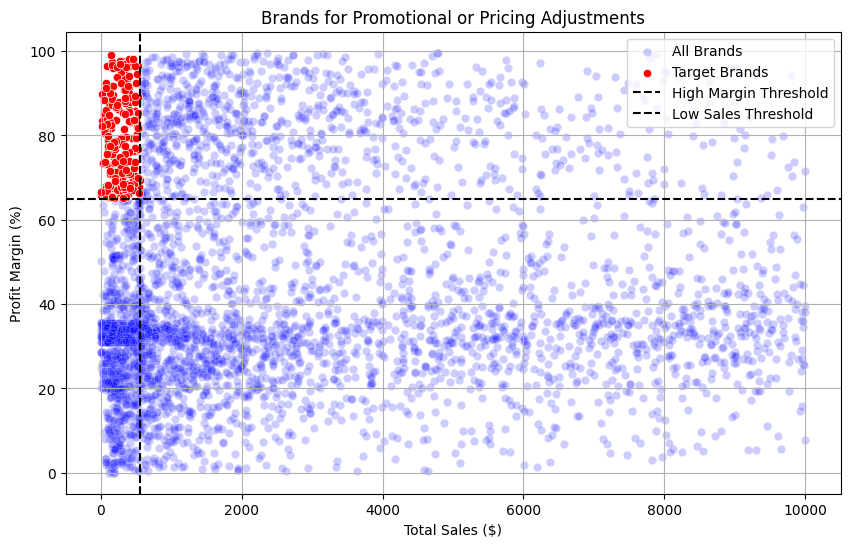

In [17]:
plt.figure(figsize=(10, 6))

# These points are colored blue and made semi-transparent (alpha=0.2) to serve as a background
sns.scatterplot(data=brand_performance, x='TotalSalesDollars', y='ProfitMargin', color='blue', label='All Brands', alpha=0.2)

# Overlay a second scatter plot specifically for the 'target_brands'.
# These are colored red.
sns.scatterplot(data=target_brands, x='TotalSalesDollars', y='ProfitMargin', color='red', label='Target Brands')

# Draw a horizontal dashed line to represent the 'High Margin Threshold'.
# This visually separates the high-margin brands from the rest.
plt.axhline(high_margin_threshold, linestyle='--', color='black', label='High Margin Threshold')

# Draw a vertical dashed line to represent the 'Low Sales Threshold'.
# This visually separates the low-sales brands.
plt.axvline(low_sales_threshold, linestyle='--', color='black', label='Low Sales Threshold')

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()

### Vendors and brands that demonstrate the highest sales performance

In [18]:
def format_dollars(value):
    # Check if the value is greater than or equal to 1 million
    if value >= 1_000_000:
        return f"{value / 1_000_000:.2f}M"
    # Check if the value is greater than or equal to 1 million
    elif value >= 1_000:
        return f"{value / 1_000:.2f}K"
    else:
        return str(value)

In [19]:
# Identify top 10 vendors and brands by sales performance
top_vendors = df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_brands = df.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)

In [20]:
top_vendors.apply(lambda x : format_dollars(x))

VendorName
DIAGEO NORTH AMERICA INC      67.99M
MARTIGNETTI COMPANIES         39.33M
PERNOD RICARD USA             32.06M
JIM BEAM BRANDS COMPANY       31.42M
BACARDI USA INC               24.85M
CONSTELLATION BRANDS INC      24.22M
E & J GALLO WINERY            18.40M
BROWN-FORMAN CORP             18.25M
ULTRA BEVERAGE COMPANY LLP    16.50M
M S WALKER INC                14.71M
Name: TotalSalesDollars, dtype: object

In [21]:
top_brands.apply(lambda x : format_dollars(x))

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: TotalSalesDollars, dtype: object

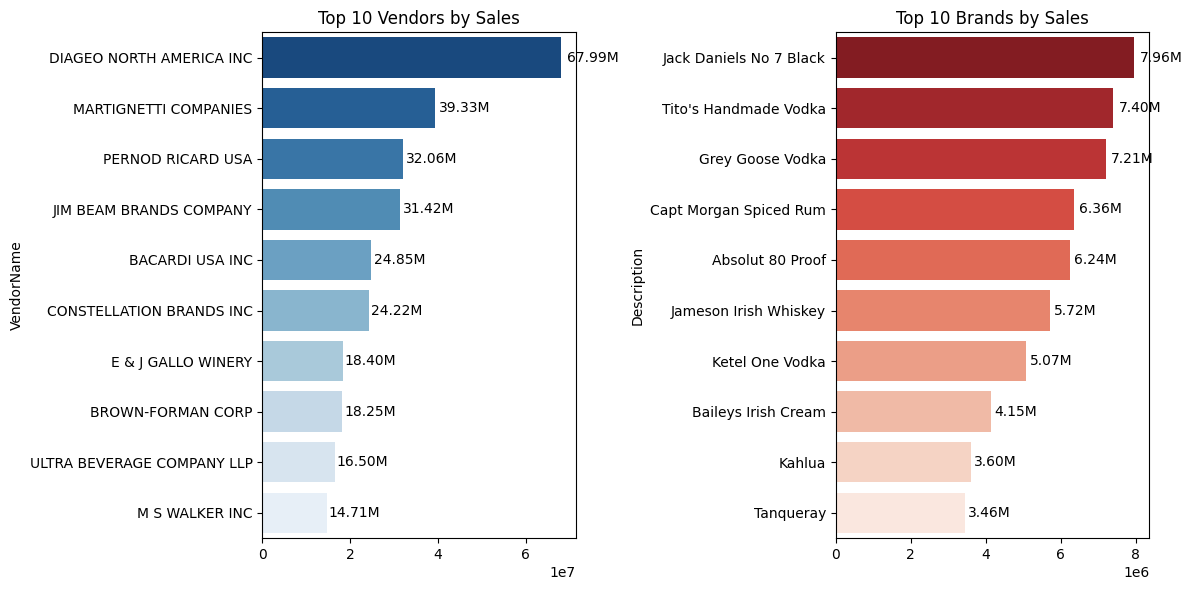

In [22]:
# Create a figure and a set of subplots
plt.figure(figsize=(12, 6))

# Plot for Top Vendors
plt.subplot(1, 2, 1) # Specifies 1 row, 2 columns, 1st plot
ax1 = sns.barplot(y=top_vendors.index, x=top_vendors.values, palette="Blues_r")
plt.title("Top 10 Vendors by Sales")

# Add text labels for the bar values in the first plot
for bar in ax1.patches:
    ax1.text(
        bar.get_width() + (bar.get_width() * 0.02), # X-position for text (bar width + 2% offset)
        bar.get_y() + bar.get_height() / 2,         # Y-position for text (middle of the bar)
        format_dollars(bar.get_width()),            # Formatted dollar value
        ha='left', va='center', fontsize=10, color='black'
    )

# Plot for Top Brands
plt.subplot(1, 2, 2)
ax2 = sns.barplot(y=top_brands.index.astype(str), x=top_brands.values, palette="Reds_r")
plt.title("Top 10 Brands by Sales")

# Add text labels
for bar in ax2.patches:
    ax2.text(
        bar.get_width() + (bar.get_width() * 0.02), # X-position for text
        bar.get_y() + bar.get_height() / 2,         # Y-position for text
        format_dollars(bar.get_width()),            # Formatted dollar value
        ha='left', va='center', fontsize=10, color='black'
    )

plt.tight_layout()
plt.show()

### Vendors that contribute the most to total purchase dollars

In [23]:
vendor_performance = df.groupby('VendorName').aggregate({
    'TotalPurchaseDollars': 'sum',
    'GrossProfit': 'sum',
    'TotalSalesDollars': 'sum'
}).reset_index()

In [24]:
vendor_performance['Purchase_Contribution%'] = vendor_performance['TotalPurchaseDollars']/ vendor_performance['TotalPurchaseDollars'].sum()*100

In [25]:
vendor_performance = round(vendor_performance.sort_values('Purchase_Contribution%', ascending = False), 2)

In [26]:
# Display top 10 Vendors
top_vendors = vendor_performance.head(10)
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,Purchase_Contribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18


In [27]:
top_vendors['Purchase_Contribution%'].sum()

65.69000000000001

In [29]:
top_vendors['Cumulative_Contribution%'] = top_vendors['Purchase_Contribution%'].cumsum()
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,Purchase_Contribution%,Cumulative_Contribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30,24.60
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76,32.36
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64,40.00
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67,45.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97,50.64
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31,54.95
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93,58.88
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63,62.51
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18,65.69


#### This implies that top 10 vendors contribute more than 65% of the total purchase for the company.

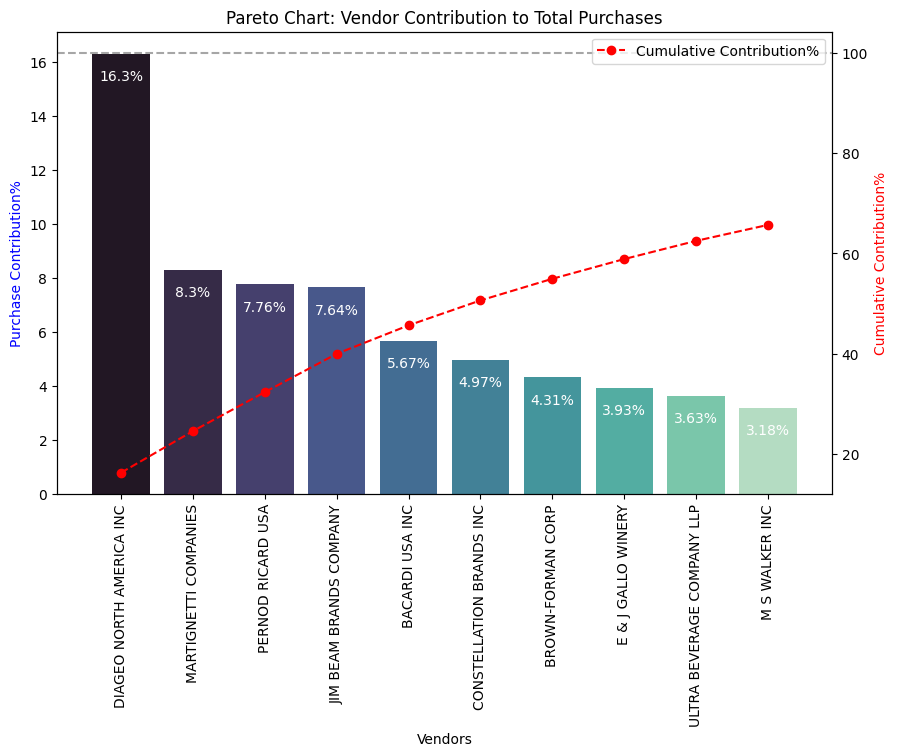

In [30]:

# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Purchase Contribution%
sns.barplot(x=top_vendors['VendorName'], y=top_vendors['Purchase_Contribution%'], palette="mako", ax=ax1)

# Add text labels on top of the bars for Purchase Contribution percentage
for i, value in enumerate(top_vendors['Purchase_Contribution%']):
    ax1.text(i, value - 1, str(value) + '%', ha='center', fontsize=10, color='white')

# Create a second Y-axis (ax2) for the cumulative line plot
ax2 = ax1.twinx()
# Line plot for Cumulative Contribution% on the second Y-axis (ax2)
ax2.plot(top_vendors['VendorName'], top_vendors['Cumulative_Contribution%'], color='red', marker='o', linestyle='dashed', label='Cumulative Contribution%')

# Set x-tick labels and rotate them for better readability
ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)

# Set labels for the Y-axes
ax1.set_ylabel('Purchase Contribution%', color='blue')
ax2.set_ylabel('Cumulative Contribution%', color='red')

# Set the title for the x-axis
ax1.set_xlabel('Vendors')

# Set the main title for the plot, indicating a Pareto Chart
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

# Add a horizontal line at 90% on the second Y-axis
ax2.axhline(y= 100, color='gray', linestyle='dashed', alpha=0.7)

# Adjust the legend position for the second Y-axis
ax2.legend(loc='upper right')

plt.show()


### How much of total procurement is dependent on the top vendors?

In [31]:
print(f"Total Purchase Contribution of top 10 vendors is {round (top_vendors ['Purchase_Contribution%'].sum() ,2)} %")

Total Purchase Contribution of top 10 vendors is 65.69 %


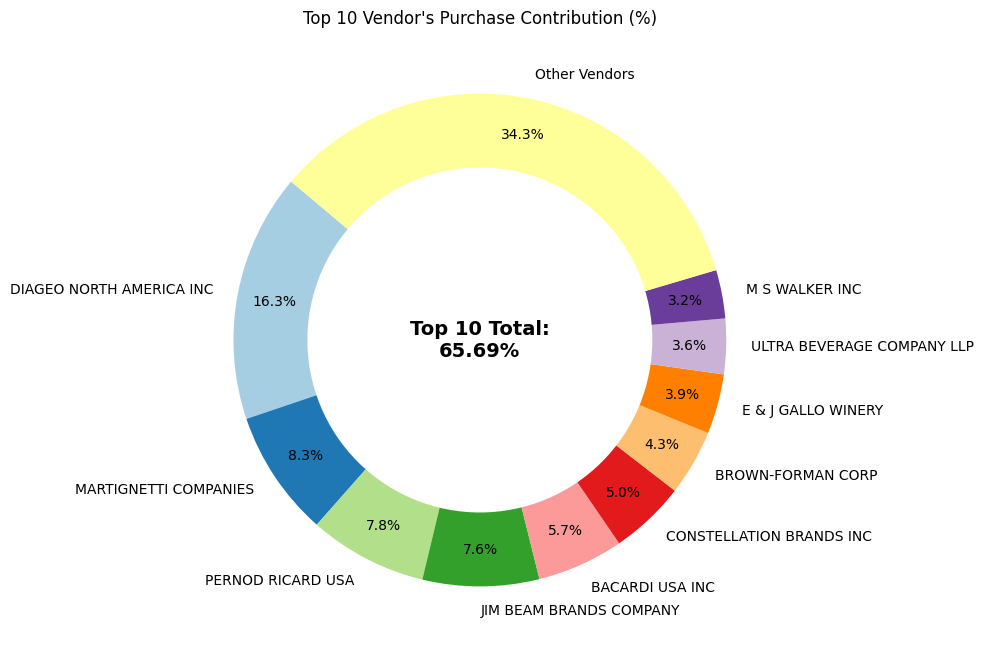

In [40]:
vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['Purchase_Contribution%'].values)
total_contribution = sum(purchase_contributions)
remaining_contribution = 100 - total_contribution

# Append "Other Vendors" category
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

# Donut chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(purchase_contributions, labels=vendors, autopct='%1.1f%%',
                                   startangle=140, pctdistance=0.85, colors=plt.cm.Paired.colors)

# Draw a white circle in the center to create a "donut" effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Add Total Contribution annotation in the center
plt.text(0, 0, f"Top 10 Total:\n{total_contribution:.2f}%", fontsize=14, fontweight='bold', ha='center', va='center')
plt. title("Top 10 Vendor's Purchase Contribution (%)")
plt.show()

#### Does purchasing in bulk reduce the unit price, and what is the optimal purchase volume for cost savings?

In [41]:
df['UnitPurchasePrice'] = df['TotalPurchaseDollars'] / df['TotalPurchaseQuantity']

In [42]:
df["OrderSize"] = pd.qcut(df["TotalPurchaseQuantity"], q=3, labels= ["Small", "Medium", "Large"])

In [47]:
df[['OrderSize', 'TotalPurchaseQuantity']]

,OrderSize,TotalPurchaseQuantity
0,Large,145080
1,Large,164038
2,Large,187407
3,Large,201682
4,Large,138109
...,...,...
8559,Small,2
8560,Small,6
8561,Small,2
8562,Small,1


In [51]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
Small,39.068186
Medium,15.486414
Large,10.777625


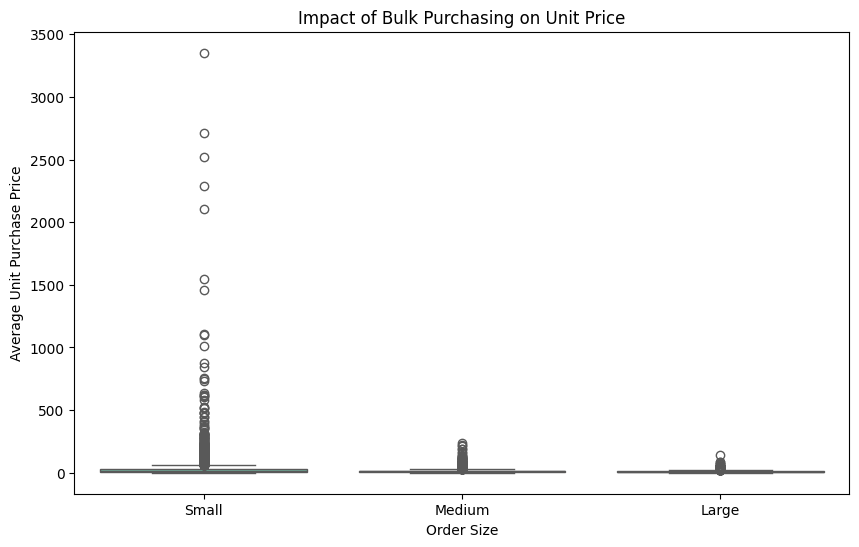

In [53]:
plt.figure(figsize = (10,6))
sns.boxplot(data=df, x="OrderSize", y="UnitPurchasePrice", palette="Set2")
plt.title("Impact of Bulk Purchasing on Unit Price")
plt.xlabel("Order Size")
plt.ylabel("Average Unit Purchase Price")
plt.show()

• Vendors buying in bulk (Large Order Size) get the lowest unit price ($10.78 per unit), meaning higher margins if they can manage inventory efficiently.

• The price difference between Small and Large orders is substantial (~72% reduction in unit cost).

• This suggests that bulk pricing strategies successfully encourage vendors to purchase in larger volumes, leading to higher overall sales despite lower per-unit revenue.

### Which vendors have low inventory turnover, indicating excess stock anf slow-moving products

In [60]:
# Selects only the rows where the 'StockTurnover' value is less than 1.
filtered_df = df[df['StockTurnover'] < 1]
grouped_by_vendor = filtered_df.groupby('VendorName')

# Select 'StockTurnover' column and calculate the mean:
average_stock_turnover = grouped_by_vendor[['StockTurnover']].mean()

# Sorts the vendors based on their calculated average 'StockTurnover'.
sorted_vendors = average_stock_turnover.sort_values('StockTurnover', ascending=True)
result = sorted_vendors.head(10)
result

,StockTurnover
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


#### How much capital is locked in unsold inventory per vendor, and which vendors contribute the most to it?

In [62]:
df ["UnsoldInventoryValue"] = (df["TotalPurchaseQuantity"] - df["TotalSalesQuantity"]) * df ["PurchasePrice"]
print( 'Total Unsold Capital:', format_dollars(df ["UnsoldInventoryValue"]. sum()))

Total Unsold Capital: 2.71M


In [64]:
# Aggregate Capital Locked per Vendor
inventory_value_per_vendor = df.groupby("VendorName")["UnsoldInventoryValue"].sum().reset_index()

# Sort Vendors with the Highest Locked Capital
inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by="UnsoldInventoryValue", ascending=False)
inventory_value_per_vendor['UnsoldInventoryValue'] = inventory_value_per_vendor['UnsoldInventoryValue'].apply(format_dollars)
inventory_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
25,DIAGEO NORTH AMERICA INC,722.21K
46,JIM BEAM BRANDS COMPANY,554.67K
68,PERNOD RICARD USA,470.63K
116,WILLIAM GRANT & SONS INC,401.96K
30,E & J GALLO WINERY,228.28K
79,SAZERAC CO INC,198.44K
11,BROWN-FORMAN CORP,177.73K
20,CONSTELLATION BRANDS INC,133.62K
61,MOET HENNESSY USA INC,126.48K
77,REMY COINTREAU USA INC,118.60K


#### What is the 95% confidence intervals for profit margins of top-performing and low-performing vendors?

In [65]:
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

In [69]:
# Filter DataFrame for vendors with total sales at or above the defined threshold.
df_top_sales = df[df["TotalSalesDollars"] >= top_threshold]
# Extract 'ProfitMargin' for top-sales vendors and remove any NaN values.
top_vendors = df_top_sales["ProfitMargin"].dropna()

# Filter DataFrame for vendors with total sales at or below the defined threshold.
df_low_sales = df[df["TotalSalesDollars"] <= top_threshold]
# Extract 'ProfitMargin' for low-sales vendors and remove any NaN values.
low_vendors = df_low_sales["ProfitMargin"].dropna()

In [70]:
top_vendors

0       25.297693
1       21.062810
2       24.675786
3       27.139908
4       28.412764
          ...    
3523    79.684817
3681    85.782102
4751    93.085860
4920    95.012530
5050    94.271857
Name: ProfitMargin, Length: 2141, dtype: float64

In [71]:
low_vendors

1622     0.568840
1646     2.513325
1786    12.479372
1803    14.366830
1812    12.428142
          ...    
8559    83.448276
8560    96.436186
8561    25.252525
8562    98.974037
8563    99.166079
Name: ProfitMargin, Length: 6423, dtype: float64

In [72]:
def calculate_confidence_interval(data, confidence=0.90):
    # Calculate the mean value of the input data.
    mean_val = np.mean(data)

    # Calculate the standard error of the mean.
    # ddof=1 for sample standard deviation (unbiased estimate).
    std_err = np.std(data, ddof=1) / np.sqrt(len(data))

    # Calculate the t-critical value for the given confidence level and degrees of freedom.
    # Degrees of freedom (df) for a sample is len(data) - 1.
    # (1 + confidence) / 2 gives the alpha/2 value for two-tailed test
    t_critical = stats.t.ppf((1 + confidence) / 2, df=len(data) - 1)

    # Calculate the margin of error.
    margin_of_error = t_critical * std_err

    # Return the mean, lower bound of the interval, and upper bound of the interval.
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error

Top Vendors 95% CI: (30.81, 31.54), Mean: 31.18
Low Vendors 95% CI: (40.76, 41.72), Mean: 41.24


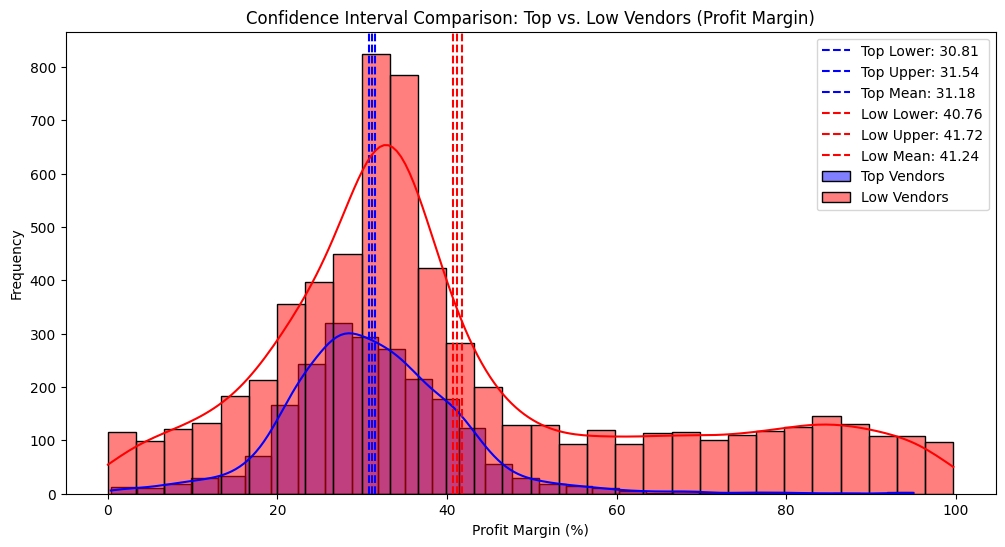

In [73]:
top_mean, top_lower, top_upper = calculate_confidence_interval(top_vendors)
low_mean, low_lower, low_upper = calculate_confidence_interval(low_vendors)

# Print the 95% confidence intervals and means for top and low vendors.
print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean: {low_mean:.2f}")

plt.figure(figsize=(12, 6))

# --- Top Vendors Plot ---
# Create a histogram for 'top_vendors' data.
# kde=True adds a Kernel Density Estimate plot.
# bins=30 specifies the number of bins for the histogram.
# alpha=0.5 sets the transparency.
# label="Top Vendors" is for the legend.
sns.histplot(top_vendors, kde=True, color="blue", bins=30, alpha=0.5, label="Top Vendors")

# Add vertical lines for the confidence interval and mean for top vendors.
# 'top_lower' and 'top_upper' define the confidence interval bounds.
# 'top_mean' marks the mean.
# 'linestyle="--"' creates a dashed line.
# 'label' is for the legend.
plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean, color="blue", linestyle="--", label=f"Top Mean: {top_mean:.2f}")

# --- Low Vendors Plot ---
# Create a histogram for 'low_vendors' data.
# Same parameters as for top vendors, but with color="red".
sns.histplot(low_vendors, kde=True, color="red", bins=30, alpha=0.5, label="Low Vendors")

# Add vertical lines for the confidence interval and mean for low vendors.
# 'low_lower' and 'low_upper' define the confidence interval bounds.
# 'low_mean' marks the mean.
# 'linestyle="--"' creates a dashed line.
# 'label' is for the legend.
plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean, color="red", linestyle="--", label=f"Low Mean: {low_mean:.2f}")

# --- Finalize Plot ---
plt.title("Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")

# Display the legend to show labels for histograms and vertical lines.
plt.legend()
plt.show()

- The confidence interval for low-performing vendors (40.48% to 42.62%) is significantly higher than that of top-performing vendors (30.74% to 31.61%). 
- This suggests that vendors with lower sales tend to maintain higher profit margins, potentially due to premium pricing or lower operational costs. 
- For High-Performing Vendors: If they aim to improve profitability, they could explore selective price adjustments, cost optimization, or bundling strategies. 
- For Low-Performing Vendors: Despite higher margins, their low sales volume might indicate a need for better marketing, competitive pricing, or improved distribution strategies.

#### Is there a significant difference in profit margins between top-performing and low-performing vendors?

Hypothesis:

H0 (Null HypSthesis): There is no significant difference in the mean profit margins of top-performing and low-performing vendors.

H1 (Alternative Hypothesis): The mean profit margins of top-performing and low-performing vendors are significantly different.

In [74]:
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

# Filter for top and low performing vendors based on sales threshold.
# Select 'ProfitMargin' and drop any rows with missing values.
top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()

# Perform a Two-Sample Independent T-Test.
# Compares the means of 'top_vendors' and 'low_vendors' profit margins.
# 'equal_var=False' conducts Welch's t-test, which does not assume equal population variances.
t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var=False)

# Print the calculated T-Statistic and P-Value.
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")

# Interpret the P-Value for statistical significance (alpha = 0.05).
if p_value < 0.05:
    print("Reject H0: There is a significant difference in profit margins between top and low-performing vendors.")
else:
    print("Fail to Reject H0: No significant difference in profit margins.")

T-Statistic: -17.6695, P-Value: 0.0000
Reject H0: There is a significant difference in profit margins between top and low-performing vendors.
